In [1]:
import numpy as np

In [2]:
import pandas as pd

# Load the Data

In [3]:
df = pd.read_csv("../data/cells_w_lineage.csv")

In [4]:
df.shape

(1226, 3)

In [5]:
df.count(axis='columns')

0       3
1       3
2       3
3       3
4       3
       ..
1221    3
1222    3
1223    3
1224    3
1225    3
Length: 1226, dtype: int64

# EDA

In [6]:
df.shape

(1226, 3)

In [7]:
df.shape[0]

1226

### Fill N/A

In [8]:
df[df.lineage_subtype.isnull()]

,CCLE_Name,lineage,lineage_subtype
390,LI7_LIVER,liver,NaN
901,RPMI6666_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,unknown,NaN
908,TK10_KIDNEY,kidney,NaN
997,COLO824_BREAST,breast,NaN
1102,SW962_VULVA,skin,NaN
1110,ARH77_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,engineered,NaN
1132,DOK_UPPER_AERODIGESTIVE_TRACT,upper_aerodigestive,NaN
1137,H3118_UPPER_AERODIGESTIVE_TRACT,upper_aerodigestive,NaN
1145,IM9_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,engineered,NaN
1168,MCCAR_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,engineered,NaN


In [9]:
# Find the indices of rows that has null lineage_subtype values
null_row_index = df[df.lineage_subtype.isnull()].index
null_row_index

Int64Index([390, 901, 908, 997, 1102, 1110, 1132, 1137, 1145, 1168, 1184,
            1209],
           dtype='int64')

In [10]:
for i in range (0, len(null_row_index)):
    row_index = null_row_index[i]
    df.lineage_subtype.iloc[row_index] = df.lineage.iloc[row_index]

In [11]:
df.iloc[null_row_index]

,CCLE_Name,lineage,lineage_subtype
390,LI7_LIVER,liver,liver
901,RPMI6666_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,unknown,unknown
908,TK10_KIDNEY,kidney,kidney
997,COLO824_BREAST,breast,breast
1102,SW962_VULVA,skin,skin
1110,ARH77_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,engineered,engineered
1132,DOK_UPPER_AERODIGESTIVE_TRACT,upper_aerodigestive,upper_aerodigestive
1137,H3118_UPPER_AERODIGESTIVE_TRACT,upper_aerodigestive,upper_aerodigestive
1145,IM9_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,engineered,engineered
1168,MCCAR_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,engineered,engineered


In [12]:
# Fill unknown
df.lineage_subtype.iloc[901] = 'blood'
df.iloc[null_row_index]

,CCLE_Name,lineage,lineage_subtype
390,LI7_LIVER,liver,liver
901,RPMI6666_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,unknown,blood
908,TK10_KIDNEY,kidney,kidney
997,COLO824_BREAST,breast,breast
1102,SW962_VULVA,skin,skin
1110,ARH77_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,engineered,engineered
1132,DOK_UPPER_AERODIGESTIVE_TRACT,upper_aerodigestive,upper_aerodigestive
1137,H3118_UPPER_AERODIGESTIVE_TRACT,upper_aerodigestive,upper_aerodigestive
1145,IM9_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,engineered,engineered
1168,MCCAR_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,engineered,engineered


### Each row has a unique name

In [13]:
len(df['CCLE_Name'].unique())

1225

In [14]:
df['lineage'].unique()

array(['blood', 'colorectal', 'skin', 'urinary_tract', 'lung', 'ovary',
       'breast', 'pancreas', 'plasma_cell', 'central_nervous_system',
       'soft_tissue', 'lymphocyte', 'bone', 'kidney', 'gastric',
       'thyroid', 'peripheral_nervous_system', 'prostate', 'fibroblast',
       'bile_duct', 'uterus', 'upper_aerodigestive', 'liver', 'esophagus',
       'cervix', 'unknown', 'adrenal_cortex', 'epidermoid_carcinoma',
       'engineered', 'embryo', 'colon', 'WT'], dtype=object)

In [15]:
len(df['lineage'].unique())

32

In [16]:
df['lineage_subtype'].unique()

array(['AML', 'colorectal_adenocarcinoma', 'melanoma',
       'bladder_carcinoma', 'NSCLC', 'ovary_adenocarcinoma',
       'breast_carcinoma', 'ALL', 'exocrine', 'multiple_myeloma',
       'glioma', 'thyroid_sarcoma', 'lymphoma_unspecified',
       'Ewing_sarcoma', 'breast_ductal_carcinoma', 'renal_cell_carcinoma',
       'gastric_adenocarcinoma', 'rhabdomyosarcoma',
       'non_hodgkin_lymphoma', 'fibrosarcoma', 'medulloblastoma',
       'thyroid_carcinoma', 'hodgkin_lymphoma', 'CML', 'neuroblastoma',
       'osteosarcoma', 'mesothelioma', 'prostate_adenocarcinoma',
       'malignant_rhabdoid_tumor', 'breast_adenocarcinoma', 'SCLC',
       'fibroblast_soft_tissue', 'fibroblast_skin',
       'gallbladder_adenocarcinoma', 'leiomyosarcoma', 'thyroid_squamous',
       'endometrial_adenocarcinoma', 'prostate_small_cell',
       'upper_aerodigestive_squamous', 'cholangiocarcinoma',
       'hepatocellular_carcinoma', 'gastric_small_cell', 'brenner_tumor',
       'mullerian_carcinoma', 'esoph

In [17]:
len(df['lineage_subtype'].unique())

92

In [18]:
len((df['lineage'] + "-" + df['lineage_subtype']).unique())

95

In [19]:
(df['lineage'] + "-" + df['lineage_subtype']).unique()

array(['blood-AML', 'colorectal-colorectal_adenocarcinoma',
       'skin-melanoma', 'urinary_tract-bladder_carcinoma', 'lung-NSCLC',
       'ovary-ovary_adenocarcinoma', 'breast-breast_carcinoma',
       'blood-ALL', 'pancreas-exocrine', 'plasma_cell-multiple_myeloma',
       'central_nervous_system-glioma', 'soft_tissue-thyroid_sarcoma',
       'lymphocyte-lymphoma_unspecified', 'bone-Ewing_sarcoma',
       'breast-breast_ductal_carcinoma', 'kidney-renal_cell_carcinoma',
       'gastric-gastric_adenocarcinoma', 'soft_tissue-rhabdomyosarcoma',
       'lymphocyte-non_hodgkin_lymphoma', 'soft_tissue-fibrosarcoma',
       'central_nervous_system-medulloblastoma',
       'thyroid-thyroid_carcinoma', 'lymphocyte-hodgkin_lymphoma',
       'blood-CML', 'peripheral_nervous_system-neuroblastoma',
       'bone-osteosarcoma', 'lung-mesothelioma',
       'prostate-prostate_adenocarcinoma',
       'kidney-malignant_rhabdoid_tumor', 'breast-breast_adenocarcinoma',
       'lung-SCLC', 'fibroblast-fib

In [20]:
data = [ df['CCLE_Name'] , df['lineage'] + "-" + df['lineage_subtype']]

# Create a new dataframe

In [21]:
new_df = df[['CCLE_Name', 'lineage_subtype']]
new_df

,CCLE_Name,lineage_subtype
0,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,AML
1,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,AML
2,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,AML
3,MONOMAC6_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,AML
4,LS513_LARGE_INTESTINE,colorectal_adenocarcinoma
5,A101D_SKIN,melanoma
6,C2BBE1_LARGE_INTESTINE,colorectal_adenocarcinoma
7,253J_URINARY_TRACT,bladder_carcinoma
8,HCC827_LUNG,NSCLC
9,ONCODG1_OVARY,ovary_adenocarcinoma


In [22]:
unique_types = new_df['lineage_subtype'].unique()

In [23]:
new_df['lineage_subtype'].unique()

array(['AML', 'colorectal_adenocarcinoma', 'melanoma',
       'bladder_carcinoma', 'NSCLC', 'ovary_adenocarcinoma',
       'breast_carcinoma', 'ALL', 'exocrine', 'multiple_myeloma',
       'glioma', 'thyroid_sarcoma', 'lymphoma_unspecified',
       'Ewing_sarcoma', 'breast_ductal_carcinoma', 'renal_cell_carcinoma',
       'gastric_adenocarcinoma', 'rhabdomyosarcoma',
       'non_hodgkin_lymphoma', 'fibrosarcoma', 'medulloblastoma',
       'thyroid_carcinoma', 'hodgkin_lymphoma', 'CML', 'neuroblastoma',
       'osteosarcoma', 'mesothelioma', 'prostate_adenocarcinoma',
       'malignant_rhabdoid_tumor', 'breast_adenocarcinoma', 'SCLC',
       'fibroblast_soft_tissue', 'fibroblast_skin',
       'gallbladder_adenocarcinoma', 'leiomyosarcoma', 'thyroid_squamous',
       'endometrial_adenocarcinoma', 'prostate_small_cell',
       'upper_aerodigestive_squamous', 'cholangiocarcinoma',
       'hepatocellular_carcinoma', 'gastric_small_cell', 'brenner_tumor',
       'mullerian_carcinoma', 'esoph

In [24]:
new_df['lineage_subtype'] == new_df['lineage_subtype'].unique()[0]

0        True
1        True
2        True
3        True
4       False
        ...  
1221    False
1222    False
1223    False
1224    False
1225    False
Name: lineage_subtype, Length: 1226, dtype: bool

In [25]:
new_col_name = 'id'

In [26]:
new_df[new_col_name] = np.nan

In [27]:
new_df

,CCLE_Name,lineage_subtype,id
0,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,AML,NaN
1,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,AML,NaN
2,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,AML,NaN
3,MONOMAC6_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,AML,NaN
4,LS513_LARGE_INTESTINE,colorectal_adenocarcinoma,NaN
5,A101D_SKIN,melanoma,NaN
6,C2BBE1_LARGE_INTESTINE,colorectal_adenocarcinoma,NaN
7,253J_URINARY_TRACT,bladder_carcinoma,NaN
8,HCC827_LUNG,NSCLC,NaN
9,ONCODG1_OVARY,ovary_adenocarcinoma,NaN


# Assign each subtype a unique id

In [28]:
for i in range (len(unique_types)):
    new_df.id[new_df['lineage_subtype'] == unique_types[i]] = i

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
new_df

,CCLE_Name,lineage_subtype,id
0,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,AML,0.0
1,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,AML,0.0
2,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,AML,0.0
3,MONOMAC6_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,AML,0.0
4,LS513_LARGE_INTESTINE,colorectal_adenocarcinoma,1.0
5,A101D_SKIN,melanoma,2.0
6,C2BBE1_LARGE_INTESTINE,colorectal_adenocarcinoma,1.0
7,253J_URINARY_TRACT,bladder_carcinoma,3.0
8,HCC827_LUNG,NSCLC,4.0
9,ONCODG1_OVARY,ovary_adenocarcinoma,5.0


In [30]:
new_df.id.unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90.,
       91.])

In [31]:
new_df.id.dtype

dtype('float64')

In [32]:
#new_df = new_df.fillna(value=-1)

In [33]:
new_df = new_df.astype({'id': 'int32'})

In [34]:
new_df['id'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91])

In [35]:
new_df.lineage_subtype.unique()

array(['AML', 'colorectal_adenocarcinoma', 'melanoma',
       'bladder_carcinoma', 'NSCLC', 'ovary_adenocarcinoma',
       'breast_carcinoma', 'ALL', 'exocrine', 'multiple_myeloma',
       'glioma', 'thyroid_sarcoma', 'lymphoma_unspecified',
       'Ewing_sarcoma', 'breast_ductal_carcinoma', 'renal_cell_carcinoma',
       'gastric_adenocarcinoma', 'rhabdomyosarcoma',
       'non_hodgkin_lymphoma', 'fibrosarcoma', 'medulloblastoma',
       'thyroid_carcinoma', 'hodgkin_lymphoma', 'CML', 'neuroblastoma',
       'osteosarcoma', 'mesothelioma', 'prostate_adenocarcinoma',
       'malignant_rhabdoid_tumor', 'breast_adenocarcinoma', 'SCLC',
       'fibroblast_soft_tissue', 'fibroblast_skin',
       'gallbladder_adenocarcinoma', 'leiomyosarcoma', 'thyroid_squamous',
       'endometrial_adenocarcinoma', 'prostate_small_cell',
       'upper_aerodigestive_squamous', 'cholangiocarcinoma',
       'hepatocellular_carcinoma', 'gastric_small_cell', 'brenner_tumor',
       'mullerian_carcinoma', 'esoph

# Write dataframe to a csv file

In [36]:
#new_df.to_csv('../data/targets.txt', index=False)

In [37]:
new_df.id.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91])

In [38]:
new_df.lineage_subtype.unique()

array(['AML', 'colorectal_adenocarcinoma', 'melanoma',
       'bladder_carcinoma', 'NSCLC', 'ovary_adenocarcinoma',
       'breast_carcinoma', 'ALL', 'exocrine', 'multiple_myeloma',
       'glioma', 'thyroid_sarcoma', 'lymphoma_unspecified',
       'Ewing_sarcoma', 'breast_ductal_carcinoma', 'renal_cell_carcinoma',
       'gastric_adenocarcinoma', 'rhabdomyosarcoma',
       'non_hodgkin_lymphoma', 'fibrosarcoma', 'medulloblastoma',
       'thyroid_carcinoma', 'hodgkin_lymphoma', 'CML', 'neuroblastoma',
       'osteosarcoma', 'mesothelioma', 'prostate_adenocarcinoma',
       'malignant_rhabdoid_tumor', 'breast_adenocarcinoma', 'SCLC',
       'fibroblast_soft_tissue', 'fibroblast_skin',
       'gallbladder_adenocarcinoma', 'leiomyosarcoma', 'thyroid_squamous',
       'endometrial_adenocarcinoma', 'prostate_small_cell',
       'upper_aerodigestive_squamous', 'cholangiocarcinoma',
       'hepatocellular_carcinoma', 'gastric_small_cell', 'brenner_tumor',
       'mullerian_carcinoma', 'esoph

In [39]:
len(new_df.lineage_subtype.unique())

92

In [42]:
(new_df.id == 0).sum()

41

In [45]:
class_counts = list()

In [46]:
for i in range (0, 92):
    class_counts.append((new_df.id == i).sum())

In [47]:
class_counts

[41,
 59,
 70,
 27,
 132,
 47,
 22,
 43,
 41,
 27,
 64,
 1,
 5,
 27,
 32,
 37,
 38,
 7,
 73,
 3,
 3,
 15,
 9,
 14,
 36,
 12,
 10,
 6,
 4,
 2,
 70,
 1,
 1,
 3,
 3,
 1,
 24,
 1,
 59,
 9,
 24,
 2,
 1,
 1,
 29,
 2,
 1,
 1,
 8,
 1,
 7,
 1,
 1,
 1,
 6,
 2,
 1,
 4,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 3,
 6,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 2,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 1]

In [48]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Number of Examples in Each Class')

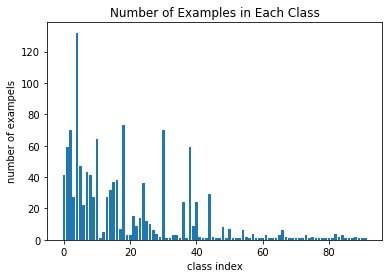

In [57]:
plt.bar(np.arange(0,92),class_counts)
plt.xlabel("class index")
plt.ylabel("number of exampels")
plt.title("Number of Examples in Each Class")